<a href="https://colab.research.google.com/github/Abdourahim445/FDSFE_Asylla/blob/main/Asylla_clustering_building_km_demo_10_16_2024.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

import missingno as msno
from sklearn import preprocessing
from sklearn.cluster import KMeans

In [11]:
url = "https://www1.nyc.gov/html/gbee/downloads/excel/nyc_benchmarking_disclosure_2017_consumption_data.xlsx"
df = pd.read_excel(url, "Information and Metrics")

In [12]:
features = df[["Year Built", "Electricity Use - Grid Purchase (kBtu)"]]
features

,Year Built,Electricity Use - Grid Purchase (kBtu)
0,1909,6551394.1
1,1963,616343.7
2,1999,8033914.4
3,1994,1976691.9
4,2012,1022951.6
...,...,...
34350,1931,316524.4
34351,1925,277672.0
34352,1926,629677.8
34353,1910,6979300.9


In [13]:
initial_shape = features.shape
initial_shape

(34355, 2)

In [14]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34355 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              34355 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  31576 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 536.9 KB


<Axes: >

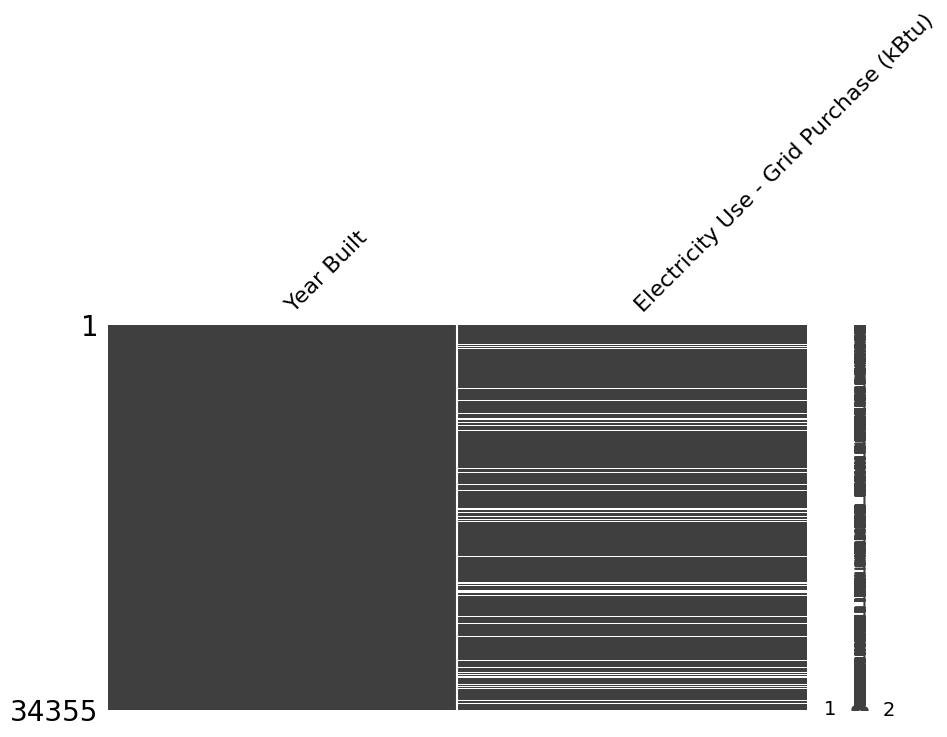

In [16]:
msno.matrix(features, figsize=(10,5))

In [17]:
features.dropna(inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 31576 entries, 0 to 34354
Data columns (total 2 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Year Built                              31576 non-null  int64  
 1   Electricity Use - Grid Purchase (kBtu)  31576 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 740.1 KB


<ipython-input-17-97be9f7e6bb0>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  features.dropna(inplace=True)


In [18]:
features.describe()

,Year Built,Electricity Use - Grid Purchase (kBtu)
count,31576.000000,3.157600e+04
mean,1945.994141,3.833599e+06
std,32.791648,1.249719e+07
min,1051.000000,-6.343300e+03
25%,1924.000000,6.888429e+05
50%,1935.000000,1.249026e+06
75%,1964.000000,2.828563e+06
max,2021.000000,5.742834e+08


In [21]:
features = features[features["Year Built"] > 1900]
features = features[features["Electricity Use - Grid Purchase (kBtu)"] > 0]
features.shape

(30256, 2)

array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

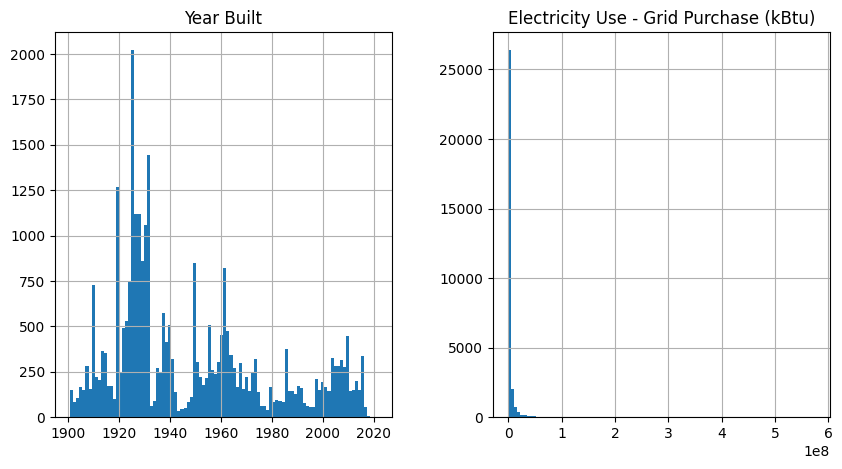

In [22]:
features.hist(figsize=(10,5), bins=100)

In [24]:
year_col = "Year Built"
elec_col = "Electricity Use - Grid Purchase (kBtu)"

features[elec_col] = np.log(features[elec_col])

array([[<Axes: title={'center': 'Year Built'}>,
        <Axes: title={'center': 'Electricity Use - Grid Purchase (kBtu)'}>]],
      dtype=object)

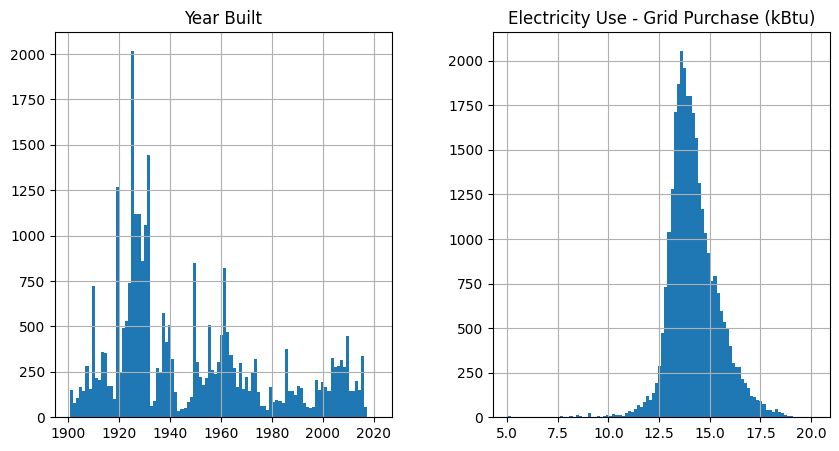

In [25]:
features.hist(figsize=(10,5), bins=100)

<Axes: xlabel='Year Built', ylabel='Electricity Use - Grid Purchase (kBtu)'>

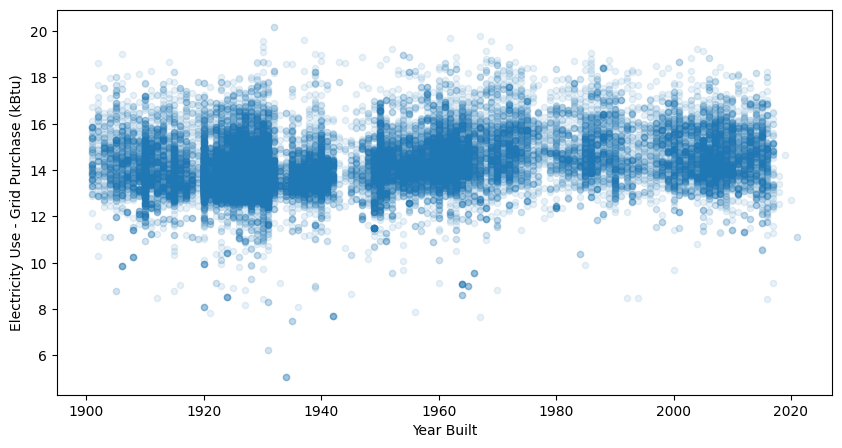

In [26]:
features.plot(year_col, elec_col, kind="scatter", alpha=0.1, figsize=(10,5))